#DMML2020 - Project
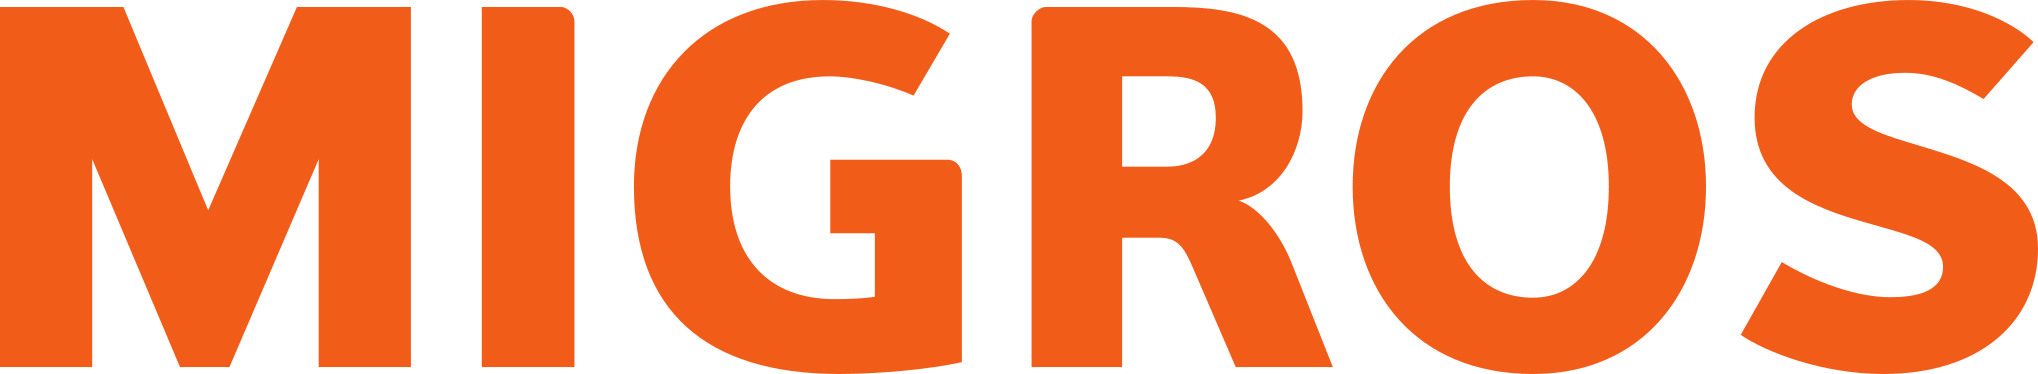
##Classification problem
In this project we analyze the data to know if a tweet is about a real disaster (target = 1) or not (target = 0).


In this first iteration we just fit the training data in the Logistic regression and observe the accuracy.


In [ ]:
# Install and update spaCy
!pip install -U spacy

# Download the english language model
!python -m spacy download en

     |████████████████████████████████| 10.4MB 4.3MB/s 
     |████████████████████████████████| 1.1MB 34.9MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.1MB 3.7MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=922244c3c75e605db8a1a12e09bb54c39047b9d388fb970b66a0b1fd7201f693
  Stored in directory: /tmp/pip-ephem-wheel-cache-2q_dm6m7/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/lo

In [187]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [188]:
# Import additional packages
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [189]:
#Reading the dataframe to build our model
df_train = pd.read_csv("https://raw.githubusercontent.com/98bao/Migros/main/data/training_data.csv")
df_train.head(30)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [190]:
#Reading dataframe which is going to be tested
df_test = pd.read_csv("https://raw.githubusercontent.com/98bao/Migros/main/data/test_data.csv")
df_test.head(5)

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball


In [191]:
#Reading the sample submission
sample_submission = pd.read_csv("https://raw.githubusercontent.com/98bao/Migros/main/data/sample_submission.csv")

In [192]:
df_train['text'].sample(30)

6228    Photoset: littlebitofbass: silinski: Ed Sheera...
844     China detains seven Christians trying to prote...
2566    DEVASTATED ISNT THE WORD ROSS OUT OF ALL PEOPL...
4332    70 Years After Atomic Bombs Japan Still Strugg...
5338    Ranking #artectura #pop2015 #Nå¼36 Florence + ...
1956    @steveycheese99 @MapMyRun where you being elec...
4415    Can you list 5 reasons why a London #TubeStrik...
5500    @modnao23 the hail is ruining everything. Plus...
3792    San Jose Mercury: Governor Brown allows parole...
5937    Our Deeds are the Reason of this #earthquake M...
3292    .@robdelaney  Catastrophe is anything but! I l...
3139    Calgary news weather and traffic for August 5 ...
1391    @allyinwondrland That sounds like the perfect ...
3324    Remove the http://t.co/Xxj2B4JxRt and Linkury ...
334     Is your team ready for a natural disaster a vi...
4429    @danagould @WaynesterAtl I agree with backgrou...
633     Cop pulls drunk driver to safety SECONDS befor...
1131    Sinjar

# Explanatory Data Analysis 
1. Base rate 
2. shape of data
3. Null Values
4. Types of data
5. Location
6. Text
7. List item 

In [193]:
# Import required packages
import gensim
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import bs4 as bs
import urllib.request
import spacy
import string
import math
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

####1. Base Rate
This indicate how often the most common value appears in the dataframe. We have to obtain an accuracy that is superior to the base rate to say that our classifier is well made

In [194]:
# Number of tweets in df_train  that support or not a real disaster 
Tweets_support = len(df_train[df_train['target'] == 1])
Tweets_does_not_support = len(df_train[df_train['target'] == 0])
print("Number of tweets that does not support a real disaster : ", Tweets_does_not_support)
print("Number of tweets that support a real disaster:", Tweets_support)

Number of tweets that does not support a real disaster :  3701
Number of tweets that support a real disaster: 2770


In [195]:
#Base rate of the train df
r = df_train['target'].value_counts() /len(df_train) 
print("Base rate =", max(r))

Base rate = 0.5719363313243703


In [196]:
#shape of data 
print("Shape of data:", df_train.shape)
print ("Number of Rows:", df_train.shape[0])
print ("Number of Columns", df_train.shape[1])

Shape of data: (6471, 5)
Number of Rows: 6471
Number of Columns 5


In [197]:
# Name of columns
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [198]:
#Info 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6471 non-null   int64 
 1   keyword   6416 non-null   object
 2   location  4330 non-null   object
 3   text      6471 non-null   object
 4   target    6471 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 252.9+ KB


In [199]:
df_train.isnull().sum()

id             0
keyword       55
location    2141
text           0
target         0
dtype: int64

In [200]:
# Total number of word 
print("Total Number of Words:", df_train['text'].apply(lambda x: len(x.split(' '))).sum())

Total Number of Words: 96544


In [201]:
# Sample
df_train['text'].sample().values[0]

'Alhaji Putin is far from being a good person sha. At least I had front row seat to his complete obliteration of Ibeto cement a competitor.'

####4 Exploring locations
As we can see there are many rows with Nan value or an unclear location name. We have to remember to drop Nan rows if we want to use location for the logistic regression. 


In [202]:
df_train['location']

0                         USA
1                         NaN
2       Palm Beach County, FL
3                         USA
4                  Australia 
                ...          
6466                ARGENTINA
6467                      NaN
6468                      NaN
6469           Beirut/Toronto
6470                      NaN
Name: location, Length: 6471, dtype: object

In [203]:
# Numbr of location
len(df_train['location'].unique())

2922

In [204]:
# group df_train by location 
my_df_train_group_by_location = df_train.groupby('location').head(1).sort_values('location')
location_list= my_df_train_group_by_location['location']
number_of_location= len(location_list)
print('Number of location:', number_of_location)
print(location_list)

Number of location: 2922
5960                          Glasgow 
1870              Melbourne, Australia
4332                              News
4819                               å_ 
4258     45å¡ 5'12.53N   14å¡ 7'24.93E
                     ...              
6186     ÌøåÀå_T: 40.736324,-73.990062
730                    å_: ?? ÌÑ ? : ?
2062              å_å_Los Mina Cityã¢
5296                å¡å¡Midwest Û¢Û¢
1                                  NaN
Name: location, Length: 2922, dtype: object


In [ ]:
# If we want to use location for the regression we have to clean the text and drop Nan values.:)





#### 6.Tweets
In this chapter We want to analyse most frequent words both in tweets that support real disaster and in those that does not support it. 


In [205]:
# We begin by grouping text message by target 
df_train_grouped =df_train[['target','text']].groupby(by='target').agg(lambda x: ' '.join(x))
corpus = df_train_grouped['text']
print(corpus)

target
0    Black Eye 9: A space battle occurred at Star O...
1    Reality Training: Train falls off elevated tra...
Name: text, dtype: object


In [206]:
corpus0 = corpus[[0]]
corpus1 = corpus[[1]]

In [207]:
# Now we create a funcion in order to find the most common words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [208]:
Whole_tweets_most_common_words = get_top_n_words(corpus, 10)
print(Whole_tweets_most_common_words)

[('co', 4038), ('http', 3663), ('the', 2755), ('in', 1687), ('to', 1649), ('of', 1547), ('and', 1189), ('is', 811), ('you', 769), ('for', 754)]


In [209]:
Tweets_0_most_common_words = get_top_n_words(corpus0, 50)
Tweets_1_most_common_words = get_top_n_words(corpus1, 50)
print("Corpus 0 :", Tweets_0_most_common_words)
print("Corpus 1 :", Tweets_1_most_common_words)


Corpus 0 : [('co', 1892), ('http', 1645), ('the', 1600), ('to', 998), ('and', 762), ('of', 754), ('in', 700), ('you', 642), ('is', 513), ('my', 479), ('it', 454), ('for', 416), ('on', 370), ('that', 345), ('with', 333), ('this', 248), ('https', 239), ('be', 235), ('me', 233), ('by', 219), ('have', 207), ('so', 206), ('like', 206), ('just', 204), ('are', 201), ('your', 198), ('at', 195), ('was', 189), ('but', 188), ('amp', 176), ('can', 174), ('not', 173), ('out', 169), ('up', 166), ('all', 165), ('he', 159), ('if', 159), ('will', 155), ('û_', 150), ('from', 148), ('new', 143), ('we', 141), ('they', 139), ('as', 138), ('what', 135), ('get', 132), ('or', 129), ('now', 127), ('no', 125), ('don', 125)]
Corpus 1 : [('co', 2146), ('http', 2018), ('the', 1155), ('in', 987), ('of', 793), ('to', 651), ('and', 427), ('on', 366), ('for', 338), ('is', 298), ('at', 256), ('by', 246), ('from', 206), ('it', 204), ('that', 176), ('with', 163), ('after', 157), ('this', 154), ('fire', 151), ('û_', 145),

In [227]:
Whole_words = get_top_n_words(corpus)
print(f"Number of strings: {len(Whole_words)}")
print(f"Number of unique strings: {len(set(Whole_words))}")

Number of strings: 19330
Number of unique strings: 19330


In [232]:
Corpus0_word = get_top_n_words(corpus0)
corpus1_word = get_top_n_words(corpus1)
print(f"Number of strings in corpus0: {len(Corpus0_word)}")
print(f"Number of strings in corpus1: {len(corpus1_word)}")


Number of strings in corpus0: 12770
Number of strings in corpus1: 10237


In [237]:
# Here I wanted to do a word Clouds with most common words but i did not get how to do it 
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=3,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  

In [242]:
# Using CountVectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(corpus).todense()
bag_of_words


matrix([[ 8,  2,  0, ...,  0,  0,  0],
        [20,  1,  1, ...,  1,  1,  1]])

In [243]:
print(f"Number of strings: {len(bag_of_words)}")
print(f"Number of unique strings (word): {len(set(bag_of_words))}")

Number of strings: 2


TypeError: ignored

In [240]:
bow0 = bag_of_words[0]
bow1= bag_of_words[1]

In [ ]:
# Features
vectorizer.vocabulary_

{'black': 2785,
 'eye': 6324,
 'space': 15711,
 'battle': 2443,
 'occurred': 12192,
 'at': 2089,
 'star': 15899,
 'o784': 12138,
 'involving': 8921,
 'fleets': 6724,
 'totaling': 17044,
 '3945': 503,
 'ships': 15236,
 'with': 18465,
 '17': 194,
 'destroyed': 5081,
 'world': 18563,
 'fedex': 6522,
 'no': 11910,
 'longer': 10387,
 'to': 16959,
 'transport': 17135,
 'bioterror': 2739,
 'germs': 7263,
 'in': 8684,
 'wake': 18109,
 'of': 12221,
 'anthrax': 1815,
 'lab': 9906,
 'mishaps': 11162,
 'http': 8320,
 'co': 4029,
 '5zdbtktww7': 781,
 'billionaires': 2720,
 'have': 7894,
 'plan': 13074,
 'free': 6932,
 'half': 7784,
 'billion': 2718,
 'dollars': 5384,
 'trapped': 17141,
 'venezuela': 17843,
 'for': 6815,
 'two': 17348,
 'years': 18926,
 'blakeschmidt': 2799,
 'reports': 14202,
 'gbqtc7sp9c': 7204,
 'jamesmelville': 9113,
 'some': 15637,
 'old': 12318,
 'testimony': 16633,
 'weapons': 18241,
 'used': 17674,
 'promote': 13436,
 'conflicts': 4237,
 'tactics': 16403,
 'corruption': 4365

In [220]:
# Dataframe of bag_of_word grouped by tweets that support real disaster and tweets that does not. 
bag_of_words = pd.DataFrame(bag_of_words, columns=vectorizer.get_feature_names())
bag_of_words.index = df_train_grouped.index
bag_of_words

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,02elqlopfk,02pm,03,030,033,034,039,03l7nwqdje,04,05,05th,06,060,061,06jst,07,08,0840728,0853,087809233445,0880,08lngclzsj,09,0abgfglh7x,0ajisa5531,0blkwcupzq,0btniwagt1,0bvk5tub4j,0c1y8g7e9p,0dqjeretxu,...,ûª93,ûªa,ûªarabia,ûªd,ûªll,ûªm,ûªre,ûªs,ûªt,ûªve,ûï,ûïa,ûïall,ûïcat,ûïdetonate,ûïfor,ûïhatchet,ûïi,ûïlittle,ûïlove,ûïnews,ûïnobody,ûïnumbers,ûïparties,ûïplans,ûïrichmond,ûïstretcher,ûïthat,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8,2,0,0,1,1,0,0,4,1,0,0,3,2,0,1,0,1,0,8,0,5,1,0,2,4,10,1,0,1,0,0,3,0,1,1,1,0,0,0,...,0,0,0,1,3,4,1,39,19,7,7,2,1,1,0,1,0,1,0,1,1,1,0,1,1,0,2,0,3,4,0,1,16,0,0,1,13,0,0,0
1,20,1,1,1,0,0,1,20,1,0,1,1,2,0,1,0,2,0,11,30,1,18,0,1,0,8,34,0,1,1,1,1,4,1,0,0,0,1,1,1,...,1,1,1,0,0,2,0,32,6,3,8,2,0,0,1,0,3,0,1,0,0,0,1,0,0,3,0,1,1,0,11,1,21,1,1,0,12,1,1,1


In [221]:
# Using TfidfVectorizer
vectorizer = TfidfVectorizer()
bag_of_words = vectorizer.fit_transform(corpus).todense()

# DataFrame
bag_of_words = pd.DataFrame(bag_of_words, columns=vectorizer.get_feature_names())
bag_of_words

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,02elqlopfk,02pm,03,030,033,034,039,03l7nwqdje,04,05,05th,06,060,061,06jst,07,08,0840728,0853,087809233445,0880,08lngclzsj,09,0abgfglh7x,0ajisa5531,0blkwcupzq,0btniwagt1,0bvk5tub4j,0c1y8g7e9p,0dqjeretxu,...,ûª93,ûªa,ûªarabia,ûªd,ûªll,ûªm,ûªre,ûªs,ûªt,ûªve,ûï,ûïa,ûïall,ûïcat,ûïdetonate,ûïfor,ûïhatchet,ûïi,ûïlittle,ûïlove,ûïnews,ûïnobody,ûïnumbers,ûïparties,ûïplans,ûïrichmond,ûïstretcher,ûïthat,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence
0,0.002068,0.000517,0.000000,0.000000,0.000363,0.000363,0.000000,0.000000,0.001034,0.000363,0.000000,0.000000,0.000776,0.000727,0.000000,0.000363,0.000000,0.000363,0.000000,0.002068,0.000000,0.001293,0.000363,0.000000,0.000727,0.001034,0.002585,0.000363,0.000000,0.000259,0.000000,0.000000,0.000776,0.000000,0.000363,0.000363,0.000363,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000363,0.00109,0.001034,0.000363,0.010082,0.004912,0.001810,0.001810,0.000517,0.000363,0.000363,0.000000,0.000363,0.000000,0.000363,0.000000,0.000363,0.000363,0.000363,0.000000,0.000363,0.000363,0.000000,0.000727,0.000000,0.000776,0.001453,0.000000,0.000259,0.004136,0.000000,0.000000,0.000363,0.003361,0.000000,0.000000,0.000000
1,0.005380,0.000269,0.000378,0.000378,0.000000,0.000000,0.000378,0.007561,0.000269,0.000000,0.000378,0.000378,0.000538,0.000000,0.000378,0.000000,0.000756,0.000000,0.004159,0.008070,0.000378,0.004842,0.000000,0.000378,0.000000,0.002152,0.009146,0.000000,0.000378,0.000269,0.000378,0.000378,0.001076,0.000378,0.000000,0.000000,0.000000,0.000378,0.000378,0.000378,...,0.000378,0.000378,0.000378,0.000000,0.00000,0.000538,0.000000,0.008608,0.001614,0.000807,0.002152,0.000538,0.000000,0.000000,0.000378,0.000000,0.001134,0.000000,0.000378,0.000000,0.000000,0.000000,0.000378,0.000000,0.000000,0.001134,0.000000,0.000378,0.000269,0.000000,0.004159,0.000269,0.005649,0.000378,0.000378,0.000000,0.003228,0.000378,0.000378,0.000378


In [ ]:
# Here we can do some more text statistics 